**ALUNOS:** Bruna Cervo, Eduardo Barbosa, Isadora Brust e Isadora Teixeira

**DISCIPLINA:** Coleta, Preparação e Análise de dados

**TURMA:** 10

# Imports

In [1]:
import pandas as pd

# SAEB

In [2]:
# Ler arquivos Excel
df1 = pd.read_excel('id3.xlsx')
df2 = pd.read_excel('id4.xlsx')

# Concatenar os dois DataFrames
df_concatenado = pd.concat([df1, df2], ignore_index=True)

# Exibir as primeiras linhas
df_concatenado.head()

,ID_SAEB,ID_REGIAO,ID_UF,IN_PREENCHIMENTO_LP,IN_PREENCHIMENTO_MT,IN_PREENCHIMENTO_CH,IN_PREENCHIMENTO_CN,PROFICIENCIA_LP_SAEB,PROFICIENCIA_MT_SAEB,PROFICIENCIA_CH_SAEB,PROFICIENCIA_CN_SAEB
0,2023,3,31,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2023,3,31,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2023,3,31,1,1,NaN,NaN,297429851.0,313841375.0,NaN,NaN
3,2023,3,31,1,1,NaN,NaN,320615893.0,242893387.0,NaN,NaN
4,2023,3,31,1,1,NaN,NaN,335198776.0,20278332.0,NaN,NaN


In [3]:
# Excluir colunas
df_concatenado.drop(columns=[
    'ID_SAEB',
    'IN_PREENCHIMENTO_LP',
    'IN_PREENCHIMENTO_MT',
    'IN_PREENCHIMENTO_CH',
    'IN_PREENCHIMENTO_CN',
    'PROFICIENCIA_CH_SAEB',
    'PROFICIENCIA_CN_SAEB'
], inplace=True)

In [4]:
# Substitui os códigos numéricos das UF por suas siglas
df_concatenado['ID_UF'] = df_concatenado['ID_UF'].replace({
    35: 'SP',
    31: 'MG',
    33: 'RJ',
    41: 'PR',
    43: 'RS',
    42: 'SC',
    32: 'ES'
})

In [5]:
# Calcula a quantidade de valores faltantes em cada coluna do DataFrame
faltantes = df_concatenado.isnull().sum()
print(faltantes[faltantes > 0])

PROFICIENCIA_LP_SAEB    220689
PROFICIENCIA_MT_SAEB    220689
dtype: int64


In [6]:
# Exclui linhas com dados faltantes
df_concatenado.dropna(inplace=True)

print(df_concatenado.shape)

(1066048, 4)


In [52]:
df_concatenado.head()

,CO_REGIAO,SG_UF,PROFICIENCIA_LP_SAEB,PROFICIENCIA_MT_SAEB,NO_REGIAO
2,3,MG,297,314,Sudeste
3,3,MG,321,243,Sudeste
4,3,MG,335,20,Sudeste
5,3,MG,194,268,Sudeste
6,3,MG,219,26,Sudeste


In [15]:
# Corrige os valores da coluna de proficiência em Língua Portuguesa e Matemática
# Os dados estavam em uma escala muito grande então dividimos por 1 milhão para deixa-los na escala correta
df_concatenado['PROFICIENCIA_LP_SAEB'] = df_concatenado['PROFICIENCIA_LP_SAEB'].apply(lambda x: round(x / 1_000_000))
df_concatenado['PROFICIENCIA_MT_SAEB'] = df_concatenado['PROFICIENCIA_MT_SAEB'].apply(lambda x: round(x / 1_000_000))

In [19]:
# Cria a nova coluna com base nos valores da coluna CO_REGIAO
df_concatenado['NO_REGIAO'] = df_concatenado['CO_REGIAO'].map({
    3: 'Sudeste',
    4: 'Sul'
})

In [21]:
# Renomeia a coluna
df_concatenado.rename(columns={
    'ID_REGIAO': 'CO_REGIAO',
}, inplace=True)

In [31]:
# Cálculos de estatística descritiva (média, moda, mediana, desvio padrão, mínimo e máximo)
# Para Língua Portuguesa
lp_count = df_concatenado['PROFICIENCIA_LP_SAEB'].count()
media_lp = df_concatenado['PROFICIENCIA_LP_SAEB'].mean()
moda_lp = df_concatenado['PROFICIENCIA_LP_SAEB'].mode()[0]
mediana_lp = df_concatenado['PROFICIENCIA_LP_SAEB'].median()
desvio_lp = df_concatenado['PROFICIENCIA_LP_SAEB'].std()
minimo_lp = df_concatenado['PROFICIENCIA_LP_SAEB'].min()
maximo_lp = df_concatenado['PROFICIENCIA_LP_SAEB'].max()

# Para Matemática
mt_count = df_concatenado['PROFICIENCIA_MT_SAEB'].count()
media_mt = df_concatenado['PROFICIENCIA_MT_SAEB'].mean()
moda_mt = df_concatenado['PROFICIENCIA_MT_SAEB'].mode()[0]
mediana_mt = df_concatenado['PROFICIENCIA_MT_SAEB'].median()
desvio_mt = df_concatenado['PROFICIENCIA_MT_SAEB'].std()
minimo_mt = df_concatenado['PROFICIENCIA_MT_SAEB'].min()
maximo_mt = df_concatenado['PROFICIENCIA_MT_SAEB'].max()

print("====== PROFICIÊNCIA LP ====== ")
print(f"Total de instâncias: {lp_count}")
print(f"Média: {media_lp:.2f}")
print(f"Moda: {moda_lp}")
print(f"Mediana: {mediana_lp}")
print(f"Desvio padrão: {desvio_lp:.2f}")
print(f"Mínimo: {minimo_lp}")
print(f"Máximo: {maximo_lp}")

print("\n====== PROFICIÊNCIA MT ====== ")
print(f"Total de instâncias: {mt_count}")
print(f"Média: {media_mt:.2f}")
print(f"Moda: {moda_mt}")
print(f"Mediana: {mediana_mt}")
print(f"Desvio padrão: {desvio_mt:.2f}")
print(f"Mínimo: {minimo_mt}")
print(f"Máximo: {maximo_mt}")

====== PROFICIÊNCIA LP ====== 
Total de instâncias: 1066048
Média: 235.87
Moda: 276
Mediana: 256.0
Desvio padrão: 85.20
Mínimo: 0
Máximo: 379

====== PROFICIÊNCIA MT ====== 
Total de instâncias: 1066048
Média: 233.39
Moda: 268
Mediana: 250.0
Desvio padrão: 84.43
Mínimo: 0
Máximo: 420


In [32]:
print(df_concatenado.shape)

(1066048, 5)


In [ ]:
# Exportar dataset
df_agrupado.to_excel('df_censo.xlsx', index=False)

# Censo Escolar

In [42]:
# Linhas e Colunas
df1 = pd.read_excel('censosudeste.xlsx')

linhas, colunas = df1.shape
print(f"O DataFrame tem {linhas} linhas e {colunas} colunas.")


df2 = pd.read_excel('censosul.xlsx')

linhas, colunas = df2.shape
print(f"O DataFrame tem {linhas} linhas e {colunas} colunas.")

O DataFrame tem 75658 linhas e 22 colunas.
O DataFrame tem 28662 linhas e 22 colunas.


In [43]:
# Ler arquivos Excel corretamente
df1 = pd.read_excel('censosudeste.xlsx')
df2 = pd.read_excel('censosul.xlsx')

# Concatenar os dois DataFrames
df_agrupado = pd.concat([df1, df2], ignore_index=True)

# Exibir as primeiras linhas
df_agrupado.head()

,NO_REGIAO,CO_REGIAO,SG_UF,CO_UF,IN_AGUA_POTAVEL,IN_ESGOTO_INEXISTENTE,IN_BANHEIRO,IN_BIBLIOTECA,IN_COZINHA,IN_LABORATORIO_CIENCIAS,...,IN_PATIO_DESCOBERTO,IN_PARQUE_INFANTIL,IN_QUADRA_ESPORTES,IN_QUADRA_ESPORTES_COBERTA,IN_REFEITORIO,IN_ACESSIBILIDADE_INEXISTENTE,IN_COMPUTADOR,IN_EQUIP_IMPRESSORA,IN_INTERNET,IN_INTERNET_APRENDIZAGEM
0,Sudeste,3,MG,31,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1,Sudeste,3,MG,31,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
2,Sudeste,3,MG,31,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
3,Sudeste,3,MG,31,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
4,Sudeste,3,MG,31,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [44]:
# Excluir colunas
df_agrupado.drop(columns=[
    'CO_UF',
    'IN_ESGOTO_INEXISTENTE',
    'IN_COZINHA',
    'IN_PATIO_COBERTO',
    'IN_PATIO_DESCOBERTO',
    'IN_PARQUE_INFANTIL',
    'IN_QUADRA_ESPORTES_COBERTA',
    'IN_ACESSIBILIDADE_INEXISTENTE',
    'IN_COMPUTADOR',
    'IN_EQUIP_IMPRESSORA',
    'IN_INTERNET'
], inplace=True)

In [45]:
# Renomeia todas colunas que começam com "IN"
df_agrupado.rename(columns=lambda col: col.replace('IN_', ''), inplace=True)

In [46]:
# Calcula a quantidade de valores faltantes em cada coluna do DataFrame
faltantes = df_agrupado.isnull().sum()
print(faltantes[faltantes > 0])

AGUA_POTAVEL               17227
BANHEIRO                   17227
BIBLIOTECA                 17227
LABORATORIO_CIENCIAS       17227
LABORATORIO_INFORMATICA    17227
QUADRA_ESPORTES            17227
REFEITORIO                 17227
INTERNET_APRENDIZAGEM      17227
dtype: int64


In [47]:
# Exclui linhas com dados faltantes
df_agrupado.dropna(inplace=True)
print(df_agrupado.shape)

(87093, 11)


In [65]:
df_agrupado.head()

,NO_REGIAO,CO_REGIAO,SG_UF,AGUA_POTAVEL,BANHEIRO,BIBLIOTECA,LABORATORIO_CIENCIAS,LABORATORIO_INFORMATICA,QUADRA_ESPORTES,REFEITORIO,INTERNET_APRENDIZAGEM
0,Sudeste,3,MG,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
1,Sudeste,3,MG,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
2,Sudeste,3,MG,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
3,Sudeste,3,MG,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,Sudeste,3,MG,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [49]:
# Calculo a quantidade de 1 e 0 em cada coluna, e a média de cada coluna.
colunas = [
    'AGUA_POTAVEL', 'BANHEIRO', 'BIBLIOTECA',
    'LABORATORIO_CIENCIAS', 'LABORATORIO_INFORMATICA',
    'QUADRA_ESPORTES', 'REFEITORIO', 'INTERNET_APRENDIZAGEM'
]

print(f"{'Coluna':40} {'Qtd 0':>10} {'Qtd 1':>10} {'Moda':>10}")
print("-" * 75)

for coluna in colunas:
    contagem = df_agrupado[coluna].value_counts().sort_index()
    zeros = contagem[0]
    uns = contagem[1]


    # Cálculo da moda
    moda = df_agrupado[coluna].mode()
    moda_valor = moda.iloc[0]

    print(f"{coluna:40} {zeros:10} {uns:10} {str(moda_valor):>10}")

Coluna                                        Qtd 0      Qtd 1       Moda
---------------------------------------------------------------------------
AGUA_POTAVEL                                    823      86270        1.0
BANHEIRO                                        929      86164        1.0
BIBLIOTECA                                    50778      36315        0.0
LABORATORIO_CIENCIAS                          73042      14051        0.0
LABORATORIO_INFORMATICA                       52532      34561        0.0
QUADRA_ESPORTES                               44780      42313        0.0
REFEITORIO                                    22404      64689        1.0
INTERNET_APRENDIZAGEM                         21281      65812        1.0


# Gráficos

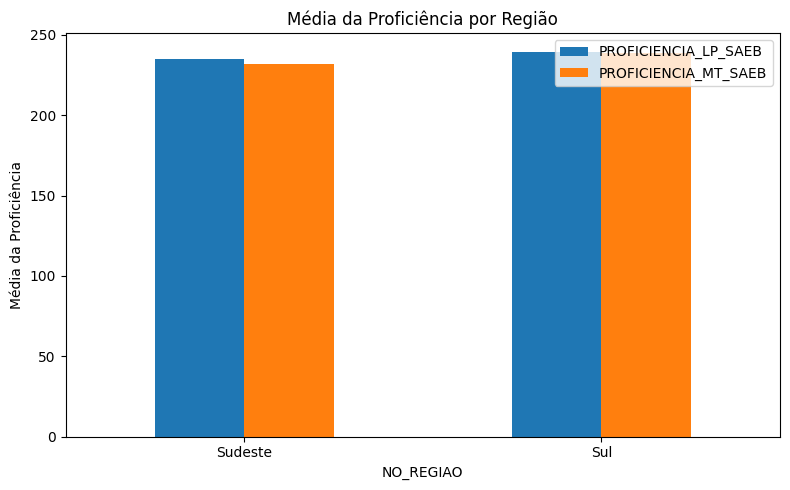

In [55]:
df_concatenado.groupby('NO_REGIAO')[['PROFICIENCIA_LP_SAEB', 'PROFICIENCIA_MT_SAEB']].mean().plot(
    kind='bar', figsize=(8, 5)
)
plt.title('Média da Proficiência por Região')
plt.ylabel('Média da Proficiência')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


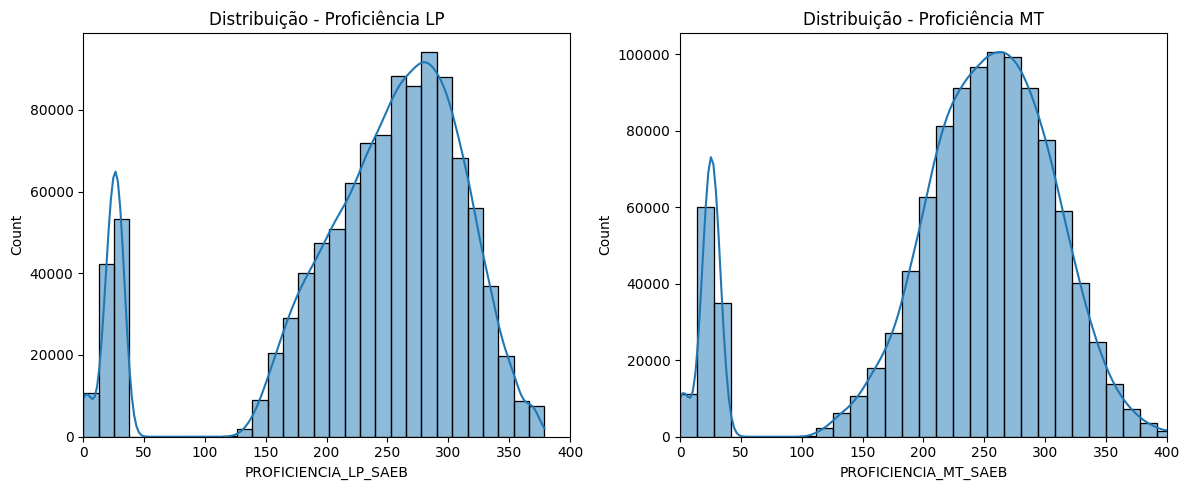

In [64]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_concatenado['PROFICIENCIA_LP_SAEB'], bins=30, kde=True)
plt.title('Distribuição - Proficiência LP')
plt.xlim(0, 400)

plt.subplot(1, 2, 2)
sns.histplot(df_concatenado['PROFICIENCIA_MT_SAEB'], bins=30, kde=True)
plt.title('Distribuição - Proficiência MT')
plt.xlim(0, 400)

plt.tight_layout()
plt.show()


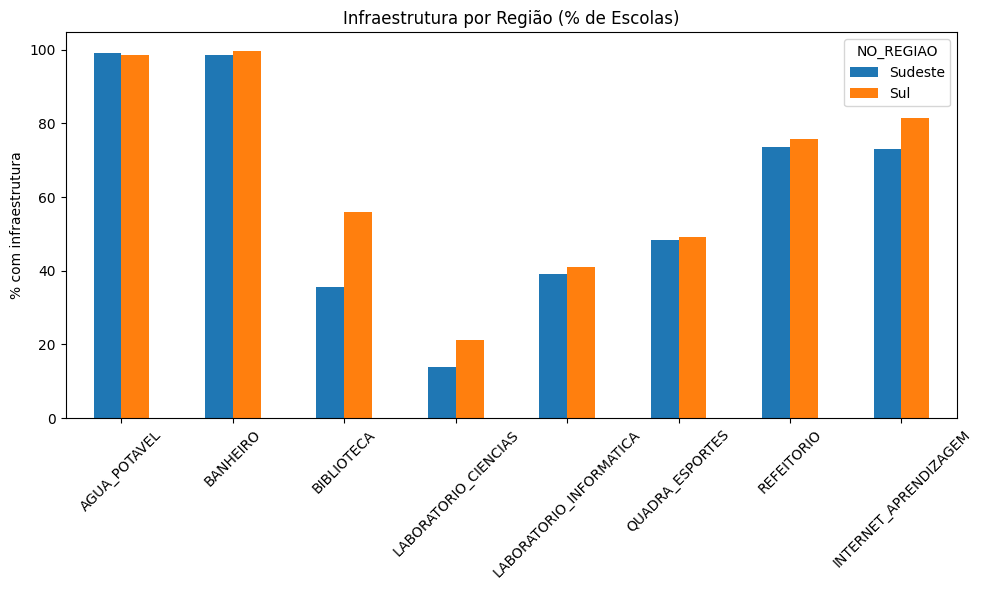

In [69]:
por_regiao = df_agrupado.groupby('NO_REGIAO')[infra_cols].mean() * 100
por_regiao.T.plot(kind='bar', figsize=(10, 6))
plt.title('Infraestrutura por Região (% de Escolas)')
plt.ylabel('% com infraestrutura')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


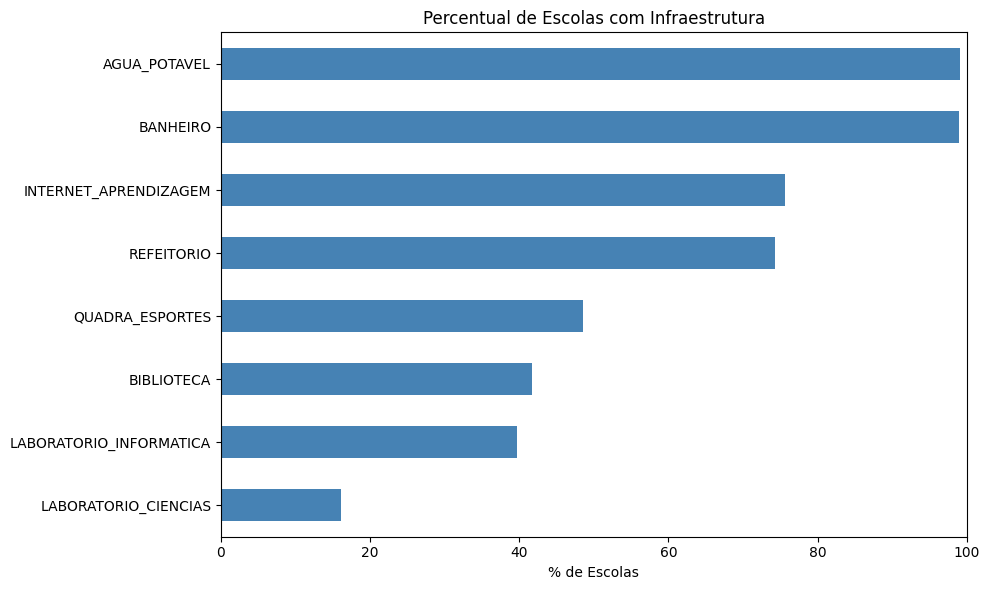

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Lista das colunas de infraestrutura
infra_cols = [
    'AGUA_POTAVEL', 'BANHEIRO', 'BIBLIOTECA',
    'LABORATORIO_CIENCIAS', 'LABORATORIO_INFORMATICA',
    'QUADRA_ESPORTES', 'REFEITORIO', 'INTERNET_APRENDIZAGEM'
]

# Conta quantos valores 1 há em cada coluna e calcula o percentual
percentuais = (df_agrupado[infra_cols] == 1).sum() / len(df_agrupado) * 100
percentuais = percentuais.sort_values()

# Gráfico de barras horizontal
percentuais.plot(kind='barh', figsize=(10, 6), color='steelblue')
plt.title('Percentual de Escolas com Infraestrutura')
plt.xlabel('% de Escolas')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()
